# DIABETIC PAITENT READMISSION CLASSIFICATION

# Problem Statement

*   The dataset represents clinical care information about Diabetes at 130 US hospitals from 1999-2008. It has 50 features such as race, gender, age, readmission etc. for about 10,000 encounters with patients.
*   The objective is to test and create a machine learning model that will predict if a patient will be readmitted in the hospital or not using 12 features.
*   Dataset used: https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008

We will initially use and analyze the following features from the dataset:


* Race
* Gender
* Age
* Time in Hospital
* Number of Lab Procedures
* Number of Procedures
* Number of Medication
* Number of Outpatient Visits
* Number of Inpatient Visits
* Number of Emergency
* Number of Diagnoses
* Prescribed Diabetes Medication




# Environment Preparation/Setup

In [ ]:
# import libraries

# numeric and data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.model_selection import train_test_split #splitting train and test datasets
from sklearn.linear_model import LogisticRegression  #Logistic regression model
from sklearn.neighbors import  KNeighborsClassifier  #KNN model
from sklearn.ensemble import RandomForestClassifier  #Random Forest model
from sklearn.preprocessing import StandardScaler     #Standardization of data
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix #Printing and visualization of result

# Data Collection

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/negojovanovich3/pythonprojects/main/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
# selecting initial features to use
selected_features = ['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'diabetesMed', 'readmitted']

In [ ]:
#adjusting dataframe
df = df[selected_features]
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,41,0,1,0,0,0,1,No,NO
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,9,Yes,>30
2,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,6,Yes,NO
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,7,Yes,NO
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,5,Yes,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   race                101766 non-null  object
 1   gender              101766 non-null  object
 2   age                 101766 non-null  object
 3   time_in_hospital    101766 non-null  int64 
 4   num_lab_procedures  101766 non-null  int64 
 5   num_procedures      101766 non-null  int64 
 6   num_medications     101766 non-null  int64 
 7   number_outpatient   101766 non-null  int64 
 8   number_emergency    101766 non-null  int64 
 9   number_inpatient    101766 non-null  int64 
 10  number_diagnoses    101766 non-null  int64 
 11  diabetesMed         101766 non-null  object
 12  readmitted          101766 non-null  object
dtypes: int64(8), object(5)
memory usage: 10.1+ MB


In [ ]:
df.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

Before we begin the data analysis, we will combine the '>30' and '<30' values as one since we we're trying to determine if a patient will be readmitted or not.

In [ ]:
df['readmitted'].replace({'>30':'YES','<30':'YES'}, inplace=True)
df['readmitted'].unique()

array(['NO', 'YES'], dtype=object)

# Exploratory Data Analysis

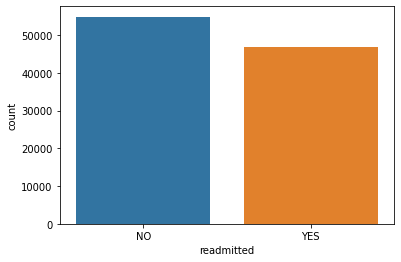

In [ ]:
# Our target feature for classification, 'readmitted'
sns.countplot(data=df, x='readmitted')

After combining the number of readmitted patients, we have a good and balanced distribution for our target feature that will be used for classification.

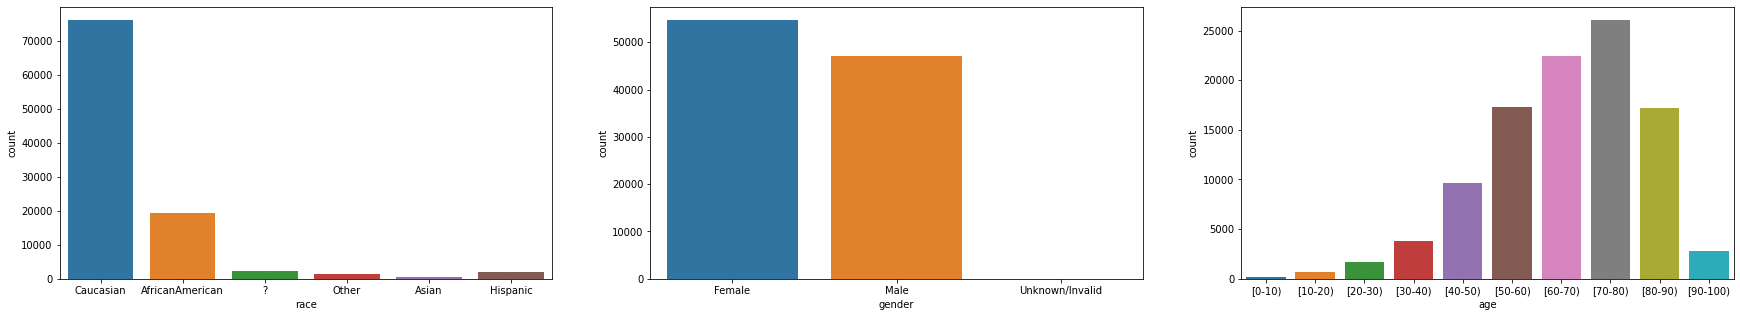

In [ ]:
# Race, Gender and Age
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,5))
sns.countplot(data=df, x='race', ax=axes[0])
sns.countplot(data=df, x='gender', ax=axes[1])
sns.countplot(data=df, x='age', ax=axes[2]);

* There is an unknown value for race, and we have the most data about 'Caucasian' patients.
* We also have an unknown value for gender. We have more female patients than male but the distribution is fairly even.
* We number of encounters with diabetic patiens are heavily condensed from the age between [40-50) and [80-90).



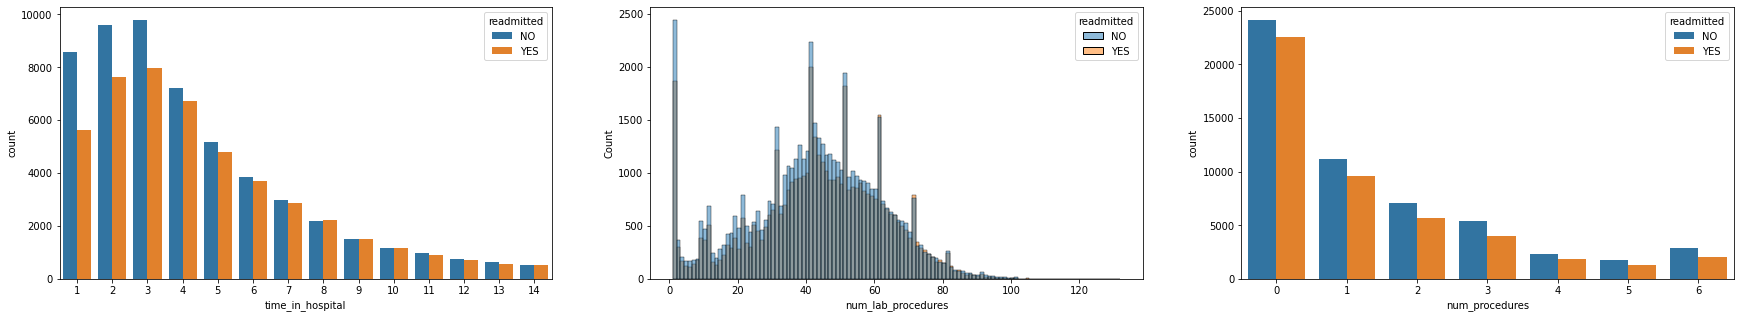

In [ ]:
# Time in hospital, Number of procedures and lab procedures
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,5))
sns.countplot(data=df, x='time_in_hospital', ax=axes[0], hue='readmitted')
sns.histplot(data=df, x='num_lab_procedures', ax=axes[1], hue='readmitted')
sns.countplot(data=df, x='num_procedures', ax=axes[2], hue='readmitted');

* Most of the patients went to the hospital about 1-5 times. The number of readmitted and not readmitted patients becomes closes together as the time in hospital increases.
* The distribution of readmitted and not readmitted patients for number of lab procedures is almost the same, which concentrates between 40-60 times.
* There are more patients who never had procedures other than lab procedures, with almost the same number of readmitted and not readmitted patients.



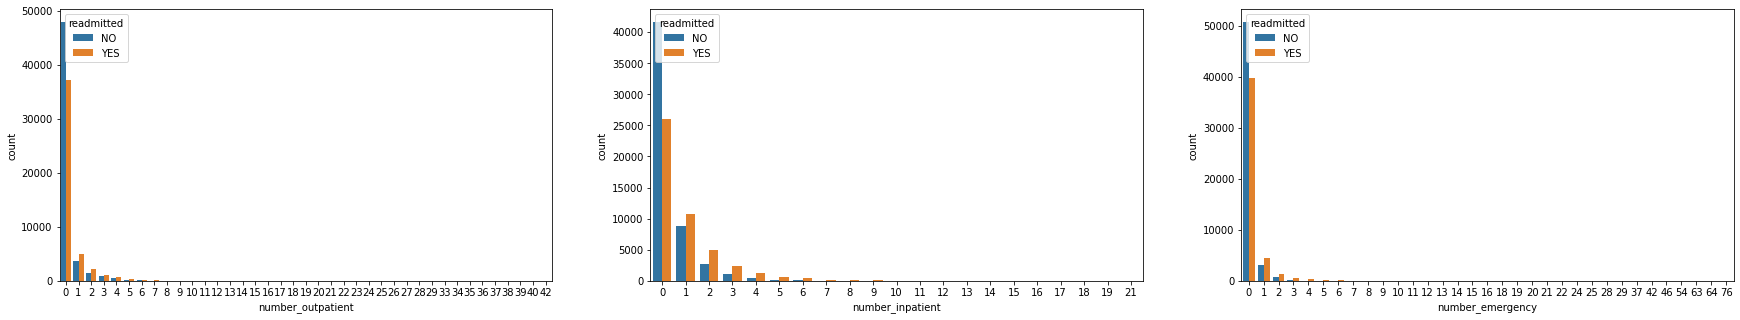

In [ ]:
# Outpatient visits, Inpatient visits, and emergency visits.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,5))
sns.countplot(data=df, x='number_outpatient', ax=axes[0], hue='readmitted')
sns.countplot(data=df, x='number_inpatient', ax=axes[1], hue='readmitted')
sns.countplot(data=df, x='number_emergency', ax=axes[2], hue='readmitted');

The distribution for number of outpatient, inpatient and emergency visits is too imbalanced and heavily condensed to 0. Ideally, we want a fairly distributed count for out machine learning model to learn properly. We might drop these features and check for improvement.

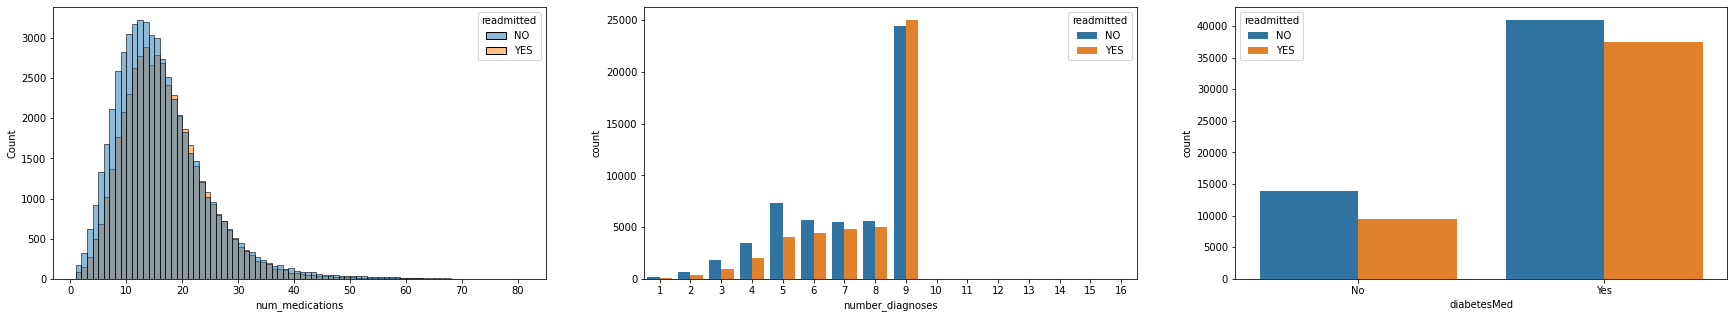

In [ ]:
# Number of Diagnoses, Medication, and Diabetes Meds.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,5))
sns.histplot(data=df, x='num_medications', ax=axes[0], hue='readmitted', bins=80)
sns.countplot(data=df, x='number_diagnoses', ax=axes[1], hue='readmitted')
sns.countplot(data=df, x='diabetesMed', ax=axes[2], hue='readmitted');

*   The distribution for the number of medications for both readmitted and not readmitted is fairly even and most have between 10-20 amount.
*   Most of the patients have 9 total number of diagnoses and the same for both readmitted and not readmitted patient. This also shows imbalance and might be removed for machine learning feature training.
* The same goes for both patients who take diabetes medications, they have a closely even distribution.

# Data Wrangling/Data Cleaning/Feature Engineering

In [ ]:
# Checking for unknown values
col_check = ['race', 'gender', 'age', 'diabetesMed', 'readmitted']
for col in col_check:
  print(f'{col}:\n{df[col].unique()}\n')

race:
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']

gender:
['Female' 'Male' 'Unknown/Invalid']

age:
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

diabetesMed:
['No' 'Yes']

readmitted:
['NO' 'YES']



In [ ]:
# Converting to null/nan for race and gender
df['race'].replace({'?': np.nan}, inplace=True)
df['gender'].replace({'Unknown/Invalid': np.nan}, inplace=True)

In [ ]:
# Converting text to numeric using dummy variables for race. (can also use replace method)
race_dummies = pd.get_dummies(df['race'])
race_dummies.head()

,AfricanAmerican,Asian,Caucasian,Hispanic,Other
0,0,0,1,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [ ]:
# Dropping original race column and adding the new columns
df.drop(['race'], axis=1, inplace=True)
df = pd.concat([df, race_dummies], axis=1)
df.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed,readmitted,AfricanAmerican,Asian,Caucasian,Hispanic,Other
0,Female,[0-10),1,41,0,1,0,0,0,1,No,NO,0,0,1,0,0
1,Female,[10-20),3,59,0,18,0,0,0,9,Yes,YES,0,0,1,0,0
2,Female,[20-30),2,11,5,13,2,0,1,6,Yes,NO,1,0,0,0,0
3,Male,[30-40),2,44,1,16,0,0,0,7,Yes,NO,0,0,1,0,0
4,Male,[40-50),1,51,0,8,0,0,0,5,Yes,NO,0,0,1,0,0


In [ ]:
# Using average or middle values for age labels.
df['age'].replace({'[0-10)':5,
                   '[10-20)':15,
                   '[20-30)':25,
                   '[30-40)':35,
                   '[40-50)':45,
                   '[50-60)':55,
                   '[60-70)':65,
                   '[70-80)':75,
                   '[80-90)':85,
                   '[90-100)':95}, inplace=True)

In [ ]:
# Converting binary (yes/no) or (male/female) values to numeric.
df['gender'].replace({'Male':0, 'Female':1}, inplace=True)
df['diabetesMed'].replace({'No':0, 'Yes':1}, inplace=True)
df['readmitted'].replace({'NO':0, 'YES':1}, inplace=True)
df.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed,readmitted,AfricanAmerican,Asian,Caucasian,Hispanic,Other
0,1.0,5,1,41,0,1,0,0,0,1,0,0,0,0,1,0,0
1,1.0,15,3,59,0,18,0,0,0,9,1,1,0,0,1,0,0
2,1.0,25,2,11,5,13,2,0,1,6,1,0,1,0,0,0,0
3,0.0,35,2,44,1,16,0,0,0,7,1,0,0,0,1,0,0
4,0.0,45,1,51,0,8,0,0,0,5,1,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   gender              101763 non-null  float64
 1   age                 101766 non-null  int64  
 2   time_in_hospital    101766 non-null  int64  
 3   num_lab_procedures  101766 non-null  int64  
 4   num_procedures      101766 non-null  int64  
 5   num_medications     101766 non-null  int64  
 6   number_outpatient   101766 non-null  int64  
 7   number_emergency    101766 non-null  int64  
 8   number_inpatient    101766 non-null  int64  
 9   number_diagnoses    101766 non-null  int64  
 10  diabetesMed         101766 non-null  int64  
 11  readmitted          101766 non-null  int64  
 12  AfricanAmerican     101766 non-null  uint8  
 13  Asian               101766 non-null  uint8  
 14  Caucasian           101766 non-null  uint8  
 15  Hispanic            101766 non-nul

Since we only have 3 null values out of 101,766 from the gender column, we can just drop those rows.

In [ ]:
#dropping 3 rows with null values
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101765
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   gender              101763 non-null  float64
 1   age                 101763 non-null  int64  
 2   time_in_hospital    101763 non-null  int64  
 3   num_lab_procedures  101763 non-null  int64  
 4   num_procedures      101763 non-null  int64  
 5   num_medications     101763 non-null  int64  
 6   number_outpatient   101763 non-null  int64  
 7   number_emergency    101763 non-null  int64  
 8   number_inpatient    101763 non-null  int64  
 9   number_diagnoses    101763 non-null  int64  
 10  diabetesMed         101763 non-null  int64  
 11  readmitted          101763 non-null  int64  
 12  AfricanAmerican     101763 non-null  uint8  
 13  Asian               101763 non-null  uint8  
 14  Caucasian           101763 non-null  uint8  
 15  Hispanic            101763 non-nul

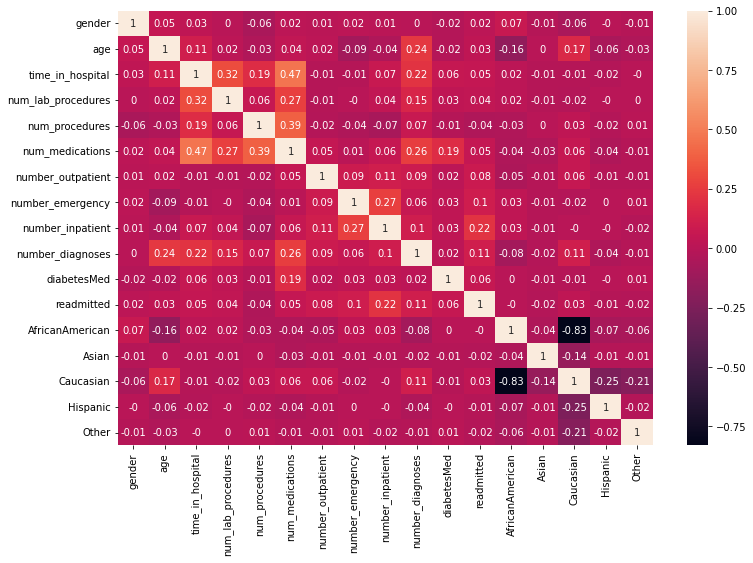

In [ ]:
#checking correlation
corr_matrix = df.corr().round(2)
plt.figure(figsize=(12,8))
sns.heatmap(data=corr_matrix, annot=True)

Now that the data is cleaned, we can see from the correlation matrix that there is barely or no linear relationship between our target and our predictor features. However, the features with the highest correlation with our target are number of diagnoses, inpatient, emergency, and outpatient visits, which also gives the highest imbalance ratio stated from EDA. 

We will skip the linear regression model (low linearity correlation) and focus on Logistic regression, KNN, and random forest models.

# Model Creation and Training

We will train and compare the machine learning models using all features, and with only features with highest correlation.

In [ ]:
# Creating training and test datasets.

x_features = df.drop('readmitted', axis=1)
y_target = df['readmitted']

# random state 17 (favorite number)
X_train, X_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.30, random_state=17, stratify=y_target)

Since we are using KNN and Random forest, it is recommended to standardize the data.

In [ ]:
# Standardize inputs
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
sc.fit(X_test)
X_test_std = sc.transform(X_test)

In [ ]:
# Creating target labels
target_labels = ['NO', 'YES']

## All Selected Features

### Logistic Regression

In [ ]:
# max iteration increased to 1000 to converge.
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train_std, y_train)
log_predict = logmodel.predict(X_test_std)

In [ ]:
print(classification_report(y_test, log_predict, target_names=target_labels))

              precision    recall  f1-score   support

          NO       0.61      0.82      0.70     16458
         YES       0.65      0.40      0.49     14071

    accuracy                           0.62     30529
   macro avg       0.63      0.61      0.60     30529
weighted avg       0.63      0.62      0.60     30529



In [ ]:
logr_cm = confusion_matrix(y_test, log_predict)
print(logr_cm)
#sns.heatmap(logr_cm, annot=True);

[[13447  3011]
 [ 8482  5589]]


### KNN Model

In [ ]:
# n=12 gave the highest accuracy after multiple tests
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train_std,y_train)
knn_predict = knn.predict(X_test_std)
print(classification_report(y_test, knn_predict, target_names=target_labels))

              precision    recall  f1-score   support

          NO       0.60      0.77      0.67     16458
         YES       0.60      0.40      0.48     14071

    accuracy                           0.60     30529
   macro avg       0.60      0.59      0.58     30529
weighted avg       0.60      0.60      0.59     30529



In [ ]:
knn_cm = confusion_matrix(y_test, knn_predict)
print(knn_cm)
#sns.heatmap(knn_cm, annot=True);

[[12655  3803]
 [ 8389  5682]]


### Random Forest

In [ ]:
# n_estimators or number of decision trees is set to 50 which gave the highest accuracy.
rfmodel = RandomForestClassifier(n_estimators=50, criterion ='entropy')
rfmodel.fit(X_train_std, y_train)
rf_predict = rfmodel.predict(X_test_std)
print(classification_report(y_test, rf_predict, target_names=target_labels))

              precision    recall  f1-score   support

          NO       0.62      0.69      0.65     16458
         YES       0.58      0.50      0.54     14071

    accuracy                           0.60     30529
   macro avg       0.60      0.59      0.59     30529
weighted avg       0.60      0.60      0.60     30529



In [ ]:
rf_cm = confusion_matrix(y_test, rf_predict)
print(rf_cm)
#sns.heatmap(rf_cm, annot=True);

[[11326  5132]
 [ 7036  7035]]


## Using Best Features

In [ ]:
best_features = ['number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses','readmitted']
df_best = df[best_features]
df_best.head()

,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
0,0,0,0,1,0
1,0,0,0,9,1
2,2,0,1,6,0
3,0,0,0,7,0
4,0,0,0,5,0


In [ ]:
# Creating training and test datasets.
x_features = df_best.drop('readmitted', axis=1)
y_target = df_best['readmitted']
X_train, X_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.30, random_state=17, stratify=y_target)
# Standardize inputs
sc.fit(X_train)
X_train_std = sc.transform(X_train)
sc.fit(X_test)
X_test_std = sc.transform(X_test)

### Logistic Regression

In [ ]:
#Logistic Regression
# max iteration increased to 1000 to converge.
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train_std, y_train)
log_predict_best = logmodel.predict(X_test_std)
print(classification_report(y_test, log_predict_best, target_names=target_labels))

              precision    recall  f1-score   support

          NO       0.61      0.82      0.70     16458
         YES       0.65      0.39      0.49     14071

    accuracy                           0.62     30529
   macro avg       0.63      0.60      0.59     30529
weighted avg       0.63      0.62      0.60     30529



In [ ]:
log_best_cm = confusion_matrix(y_test, log_predict_best)
print(log_best_cm)

[[13458  3000]
 [ 8580  5491]]


### KNN Model

In [ ]:
#KNN Model
# n=12 gave the highest accuracy after multiple tests
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train_std,y_train)
knn_predict_best = knn.predict(X_test_std)
print(classification_report(y_test, knn_predict_best, target_names=target_labels))

              precision    recall  f1-score   support

          NO       0.59      0.59      0.59     16458
         YES       0.52      0.52      0.52     14071

    accuracy                           0.56     30529
   macro avg       0.56      0.56      0.56     30529
weighted avg       0.56      0.56      0.56     30529



In [ ]:
knn_best_cm = confusion_matrix(y_test, knn_predict_best)
print(knn_best_cm)

[[9674 6784]
 [6695 7376]]


### Random Forest

In [ ]:
# Random Forest
rfmodel = RandomForestClassifier(n_estimators=50, criterion ='entropy')
rfmodel.fit(X_train_std, y_train)
rf_predict_best = rfmodel.predict(X_test_std)
print(classification_report(y_test, rf_predict_best, target_names=target_labels))

              precision    recall  f1-score   support

          NO       0.63      0.75      0.68     16458
         YES       0.62      0.48      0.54     14071

    accuracy                           0.62     30529
   macro avg       0.62      0.61      0.61     30529
weighted avg       0.62      0.62      0.62     30529



In [ ]:
rf_best_cm = confusion_matrix(y_test, rf_predict_best)
print(rf_best_cm)

[[12350  4108]
 [ 7341  6730]]


# Model Evaluation

In [ ]:
# Getting all accuracy scores.
scores_all = [accuracy_score(y_test,log_predict), accuracy_score(y_test, knn_predict), accuracy_score(y_test, rf_predict)]
scores_best = [accuracy_score(y_test,log_predict_best), accuracy_score(y_test, knn_predict_best), accuracy_score(y_test, rf_predict_best)]

## All Features

In [ ]:
print('Prediction Scores Using All Selected Features\n')
print(f'Logistic Regression:\t{scores_all[0]}\nKNN Model:\t\t{scores_all[1]}\nRandom Forest:\t\t{scores_all[2]}')

Prediction Scores Using All Selected Features

Logistic Regression:	0.6235382750827082
KNN Model:		0.6006420125126929
Random Forest:		0.6014281502833372


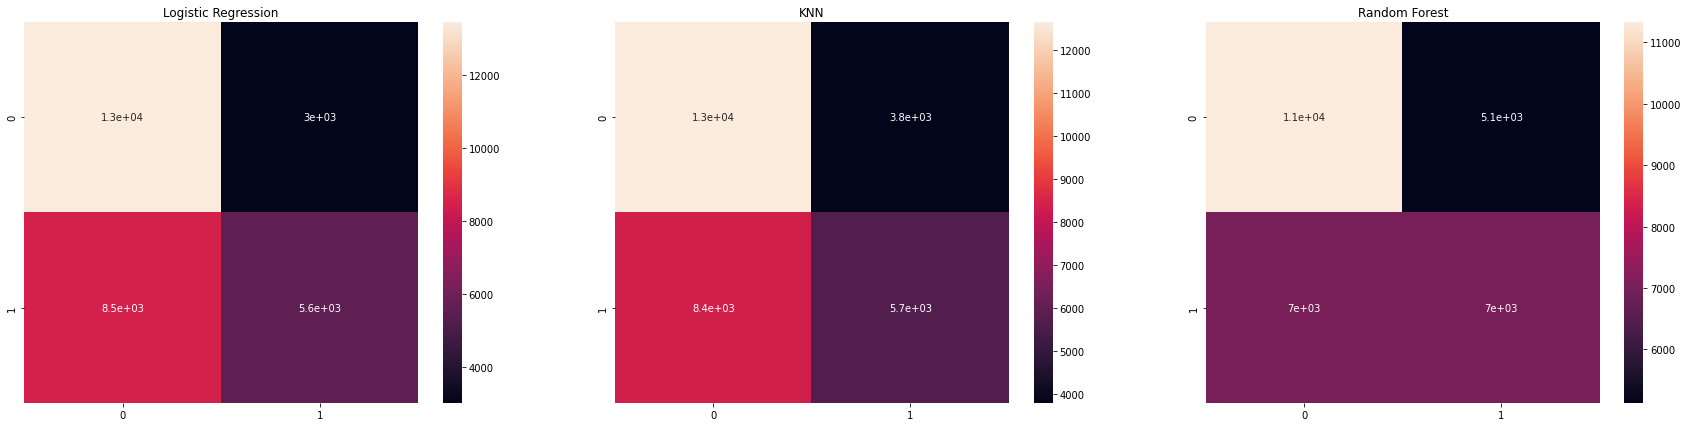

In [ ]:
#Confusion Matrix
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,7))
axes[0].set_title('Logistic Regression')
sns.heatmap(logr_cm, ax=axes[0], annot=True)
axes[1].set_title('KNN')
sns.heatmap(knn_cm, ax=axes[1], annot=True)
axes[2].set_title('Random Forest')
sns.heatmap(rf_cm, ax=axes[2], annot=True);

* The Logistic Regression model gave the highest accuracy and performed a little better than the other KNN and Random Forest model.

* The random forest model gave an almost similar number of prediction values for True Negatives and False Negatives, while Logistic Regression and KNN gave the highest number of True Positives.

## Best Features

In [ ]:
print('Prediction Scores Using the Best Features\n')
print(f'Logistic Regression:\t{scores_best[0]}\nKNN Model:\t\t{scores_best[1]}\nRandom Forest:\t\t{scores_best[2]}')

Prediction Scores Using the Best Features

Logistic Regression:	0.6206885256641227
KNN Model:		0.558485374561892
Random Forest:		0.6249795276622228


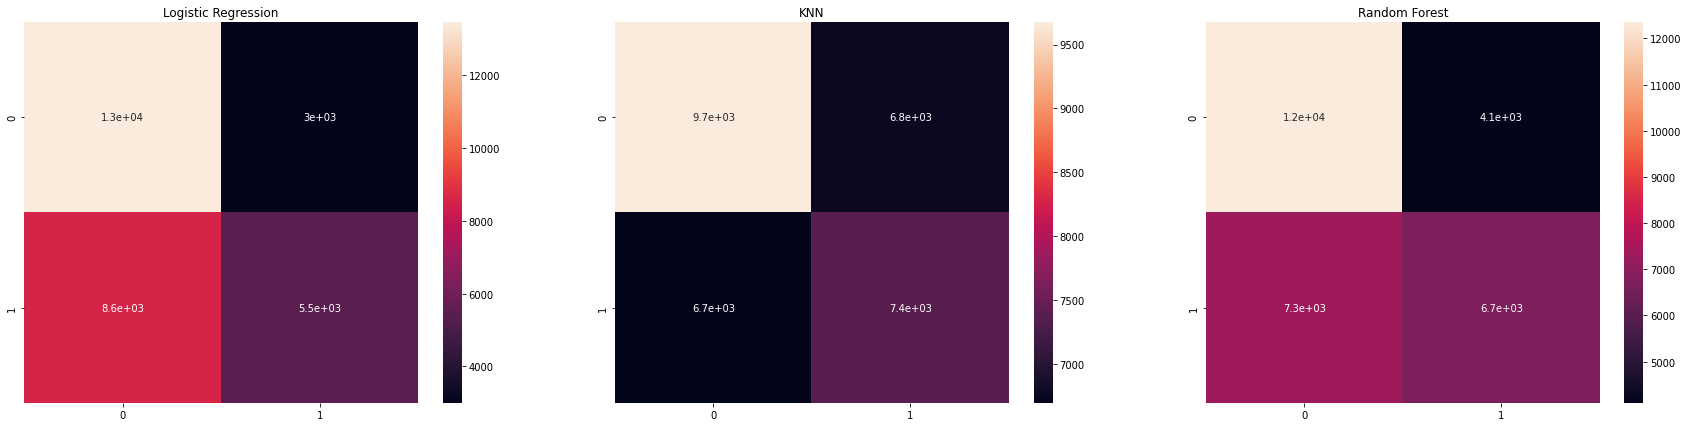

In [ ]:
#Confusion Matrix
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,7))
axes[0].set_title('Logistic Regression')
sns.heatmap(log_best_cm, ax=axes[0], annot=True)
axes[1].set_title('KNN')
sns.heatmap(knn_best_cm, ax=axes[1], annot=True)
axes[2].set_title('Random Forest')
sns.heatmap(rf_best_cm, ax=axes[2], annot=True);

* Random forest and Logistic Regression performed much better than KNN. Random forest model is just slightly higher by 0.1% than logistic regression.

# Model Selection

The best model to use for this dataset to determine the likelihood of being readmitted is the Logistic Regression model. However, if we just want to use all the best features, the random forest is the model that gave the highest accuracy with 62.49%.

# Conclusion

The selected model, Random Forest (best features), and Logistic Regression (all features), gave an accuracy of 62% for predicting if a diabetic patient will be readmitted or not. The accuracy of 60% for a machine learning model is not good enough to be used. Ideally, we want an accuracy of at least 80-90%. In order to improve the accuracy, it is probably better to use all possible features and use the features with the best correlation. It is also good to gather more data and use other machine learning models to perform the prediction.